<a href="https://colab.research.google.com/github/DivyaNarayan0613/Cardio/blob/main/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.layers import Conv2DTranspose, Conv2D


# Load the MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Normalize and reshape the images
train_images = (train_images.astype(np.float32) - 127.5) / 127.5
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))

# Define the generator model
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(Dense(128, activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='tanh'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training the GAN
batch_size = 64
epochs = 300

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    generated_images = generator.predict(noise)
    image_batch = train_images[np.random.randint(0, train_images.shape[0], size=batch_size)]

    X = np.concatenate([image_batch, generated_images])
    y_dis = np.zeros(2 * batch_size)
    y_dis[:batch_size] = 0.9

    d_loss = discriminator.train_on_batch(X, y_dis)

    noise = np.random.normal(0, 1, size=[batch_size, 100])
    y_gen = np.ones(batch_size)
    g_loss = gan.train_on_batch(noise, y_gen)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Discriminator Loss: {d_loss[0]} | Discriminator Accuracy: {100 * d_loss[1]}% | Generator Loss: {g_loss}")


C:\Users\divya\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 12ms/step
Epoch 0 | Discriminator Loss: 0.6847046613693237 | Discriminator Accuracy: 36.71875% | Generator Loss: 0.6822697520256042
2/2 [==============================] - 0s 16ms/step
Epoch 100 | Discriminator Loss: 0.20837560296058655 | Discriminator Accuracy: 50.0% | Generator Loss: 0.2063719630241394
2/2 [==============================] - 0s 16ms/step
Epoch 200 | Discriminator Loss: 0.5259287357330322 | Discriminator Accuracy: 28.90625% | Generator Loss: 2.280141830444336
2/2 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

C:\Users\divya\AppData\Local\Temp\ipykernel_18800\1885456370.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


1/1 [==============================] - 0s 24ms/step


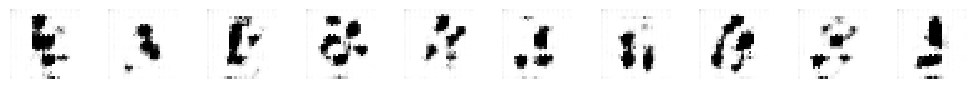

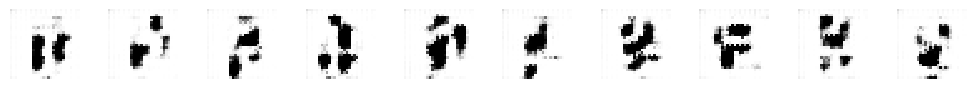

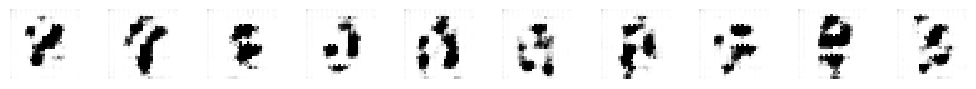

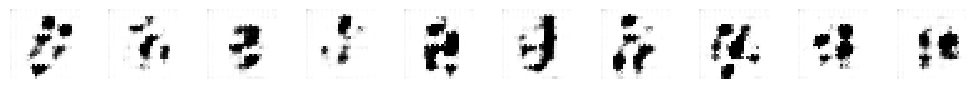

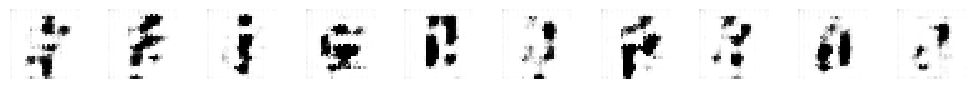

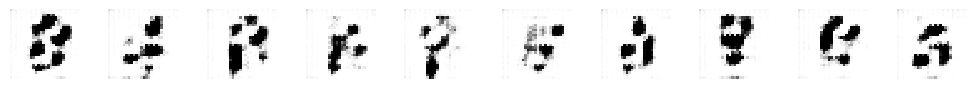

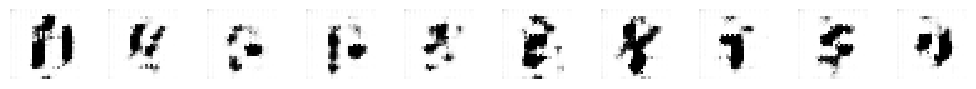

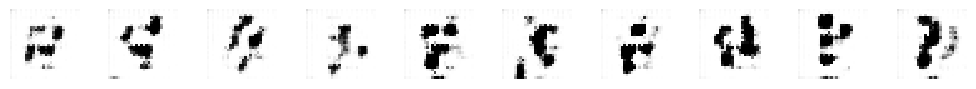

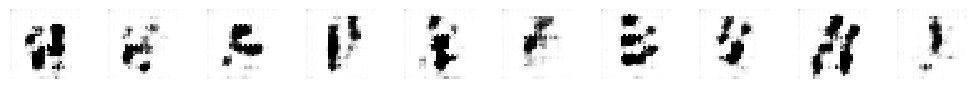

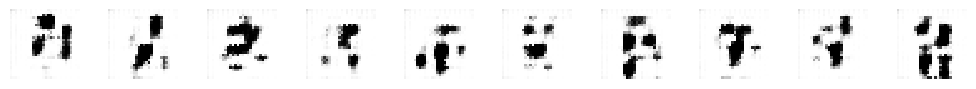

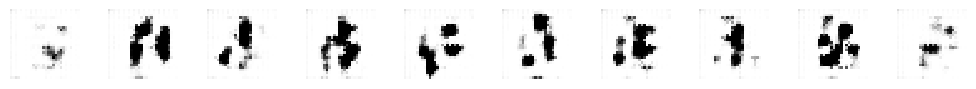

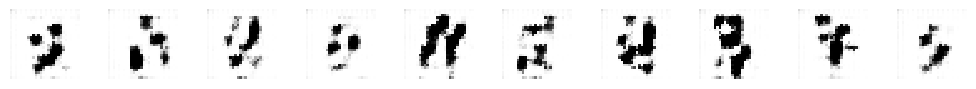

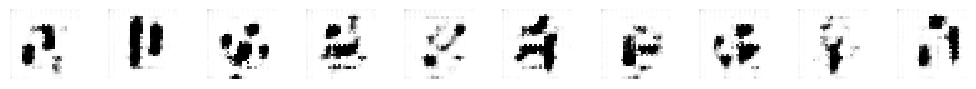

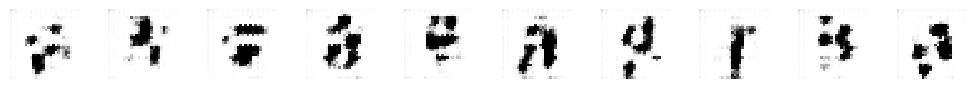

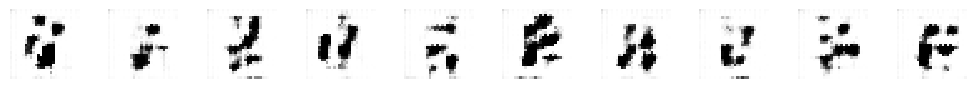

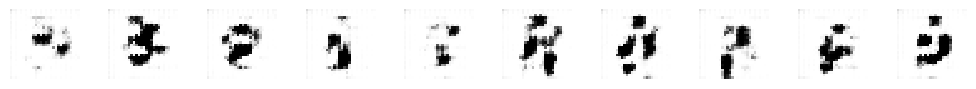

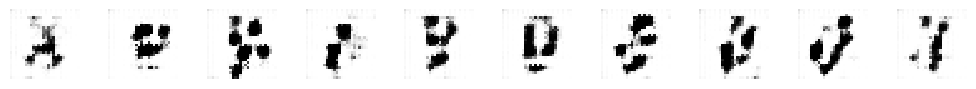

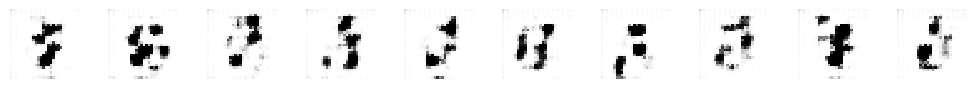

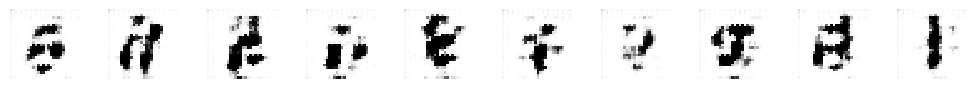

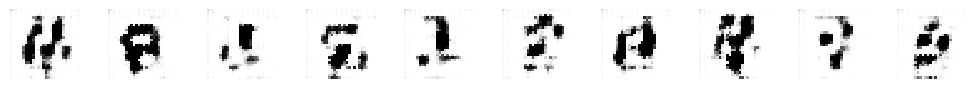

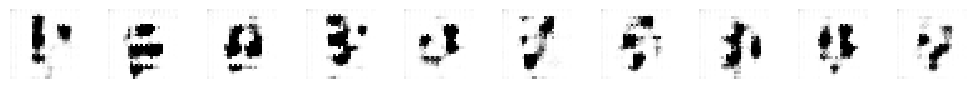

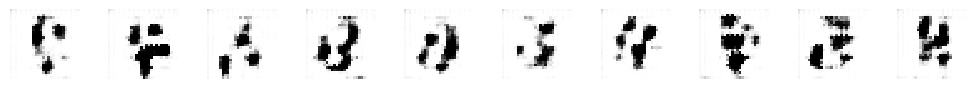

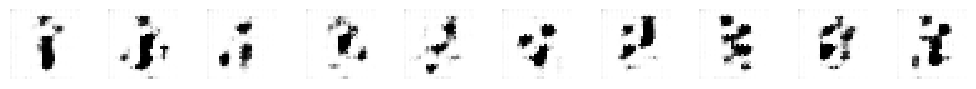

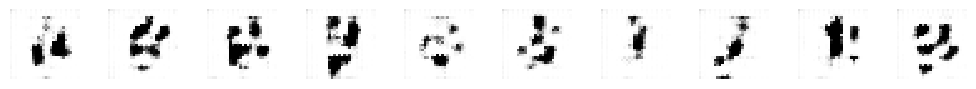

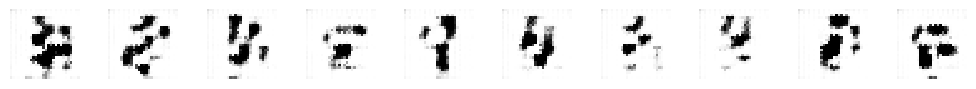

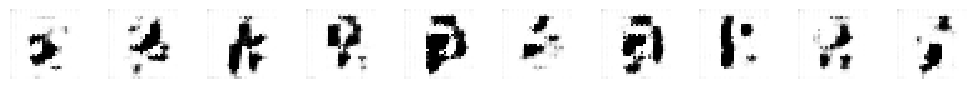

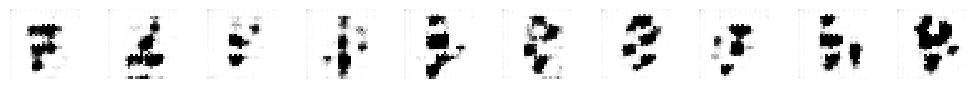

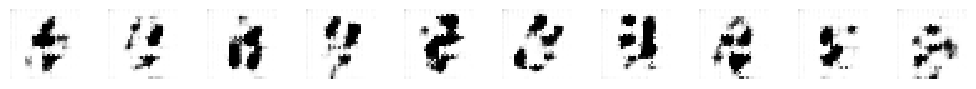

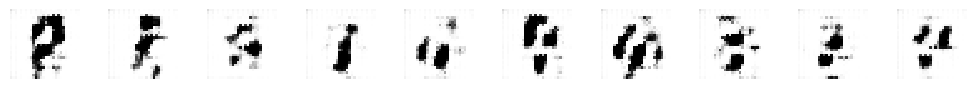

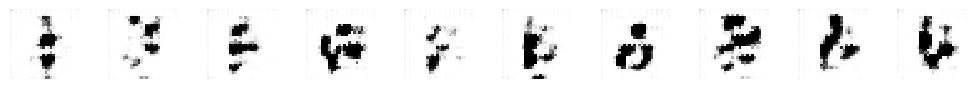

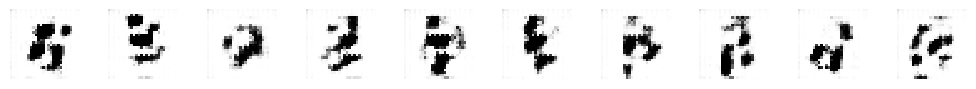

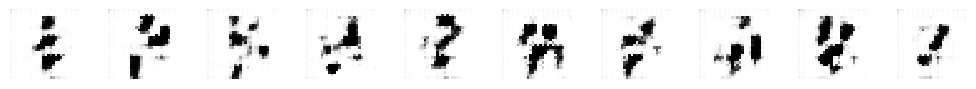

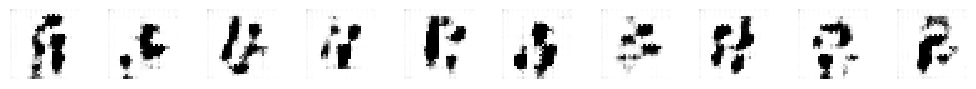

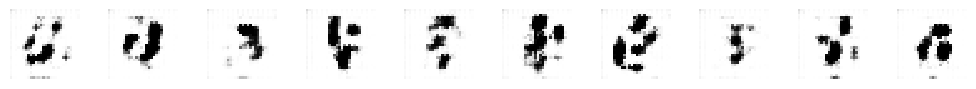

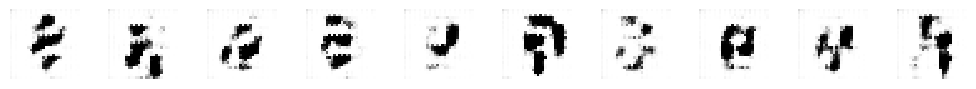

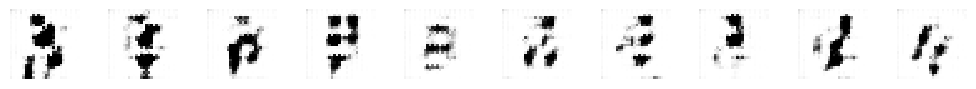

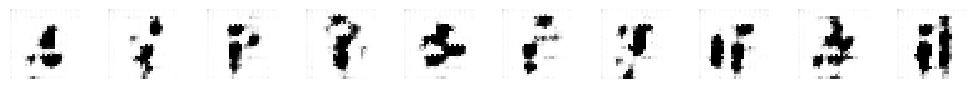

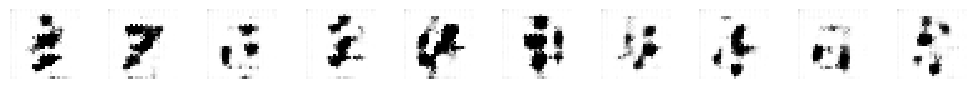

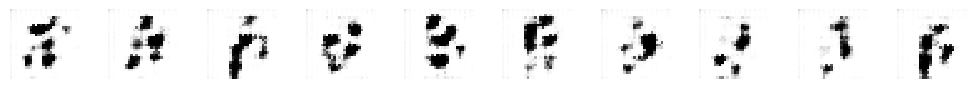

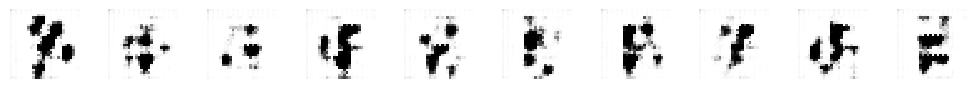

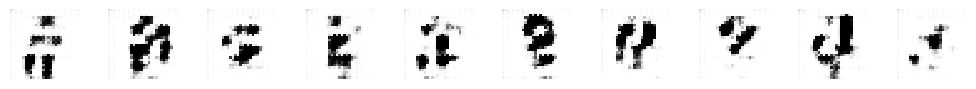

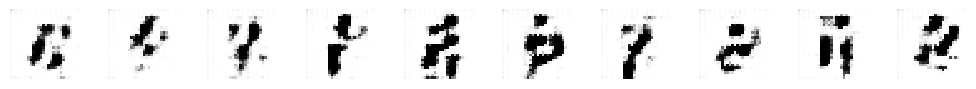

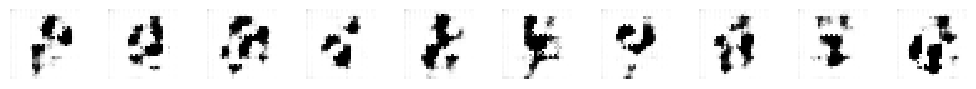

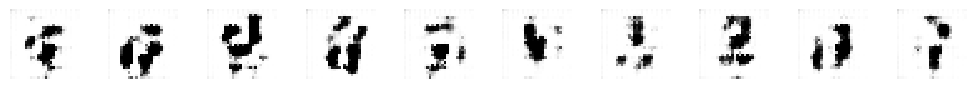

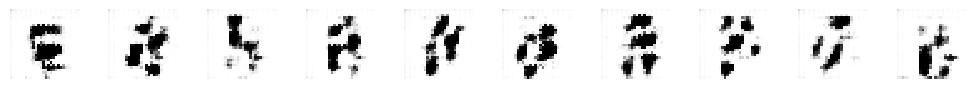

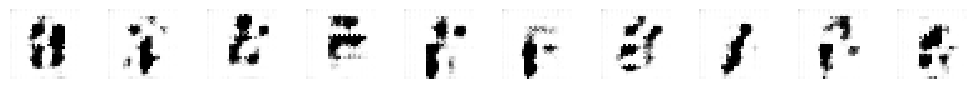

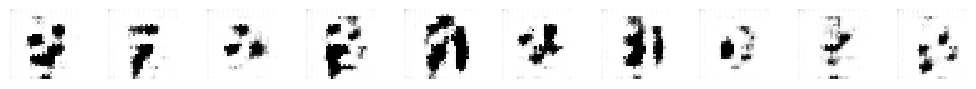

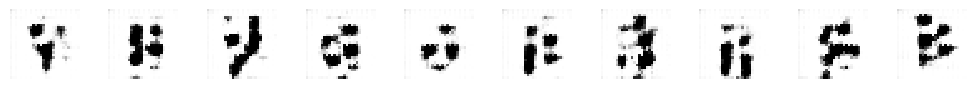

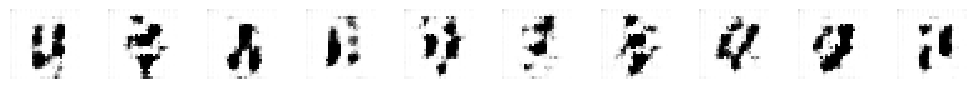

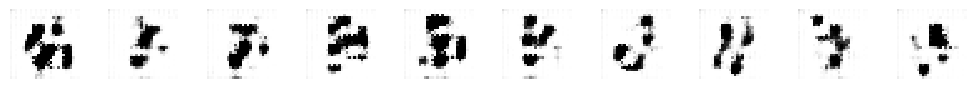

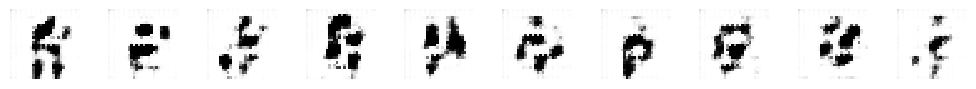

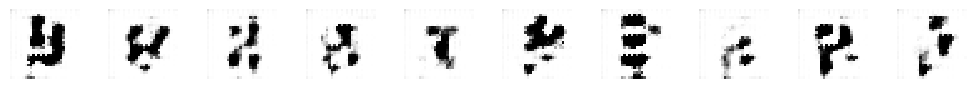

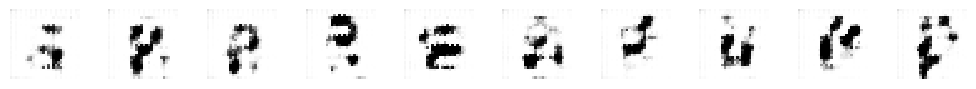

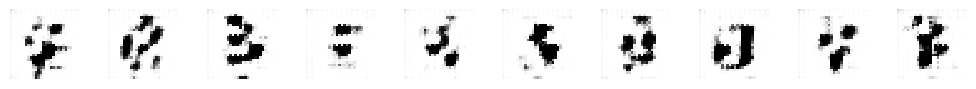

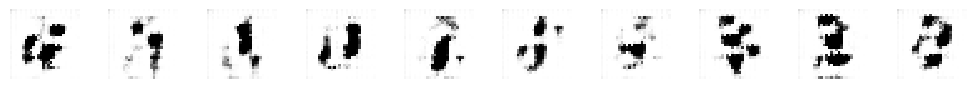

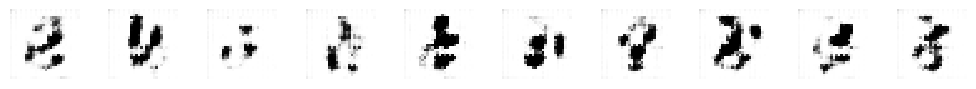

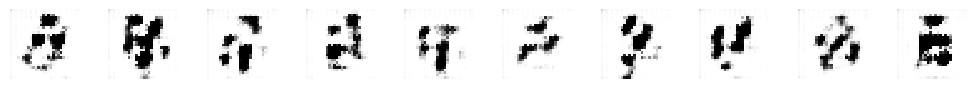

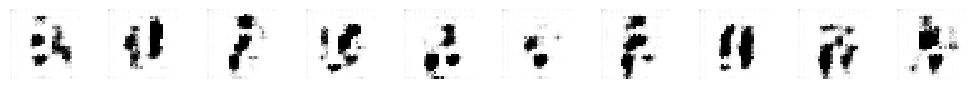

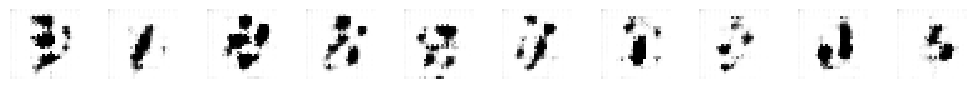

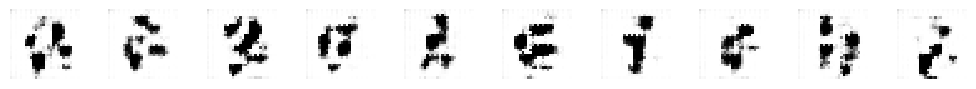

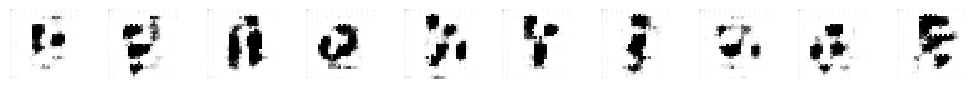

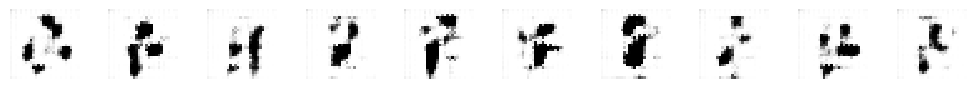

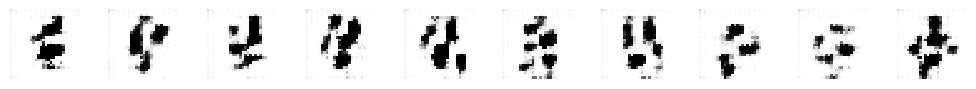

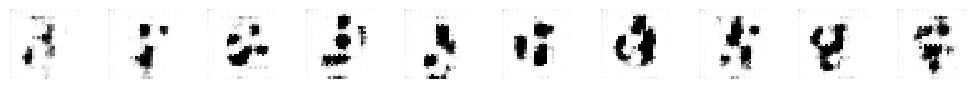

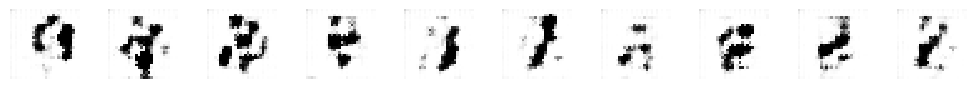

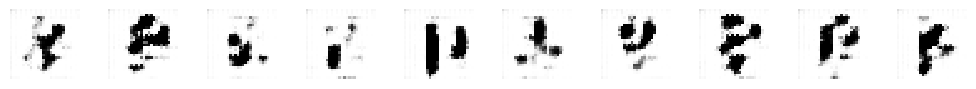

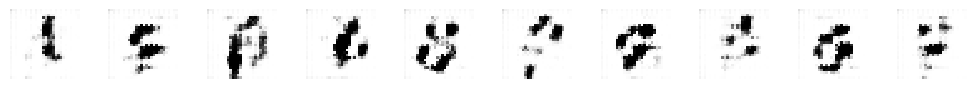

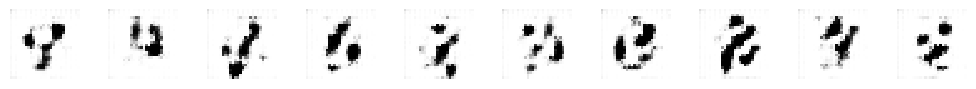

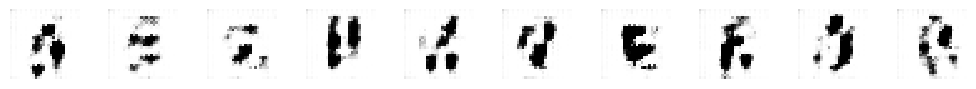

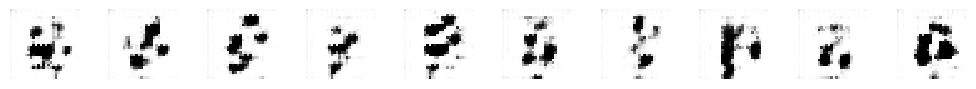

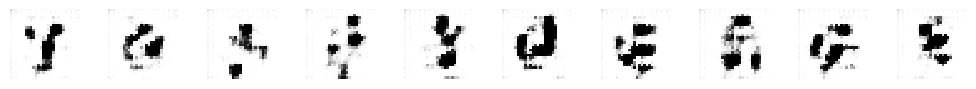

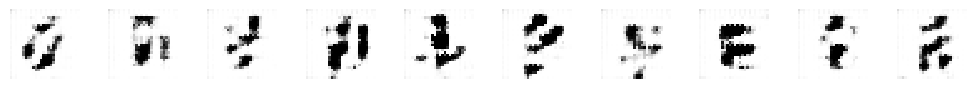

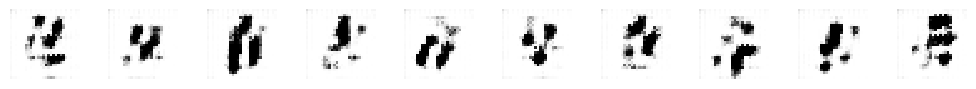

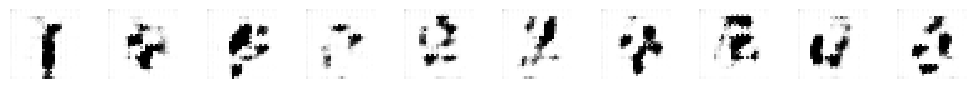

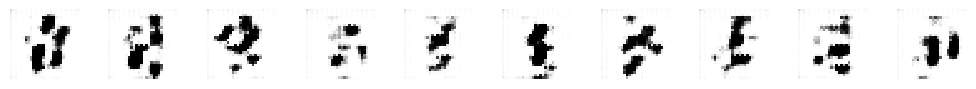

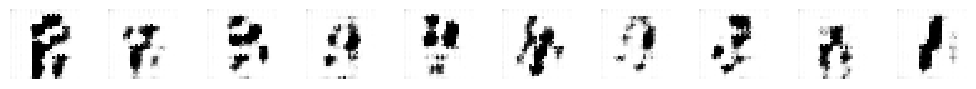

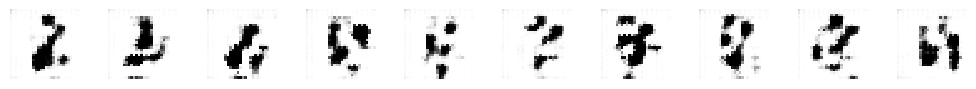

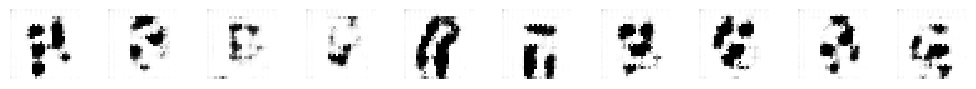

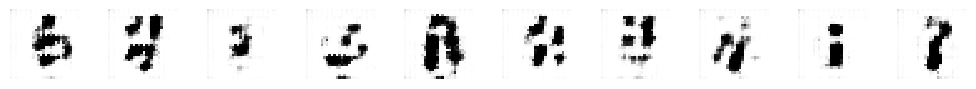

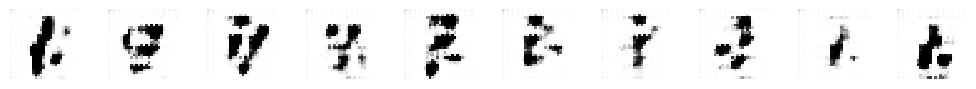

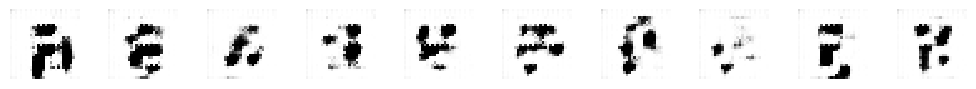

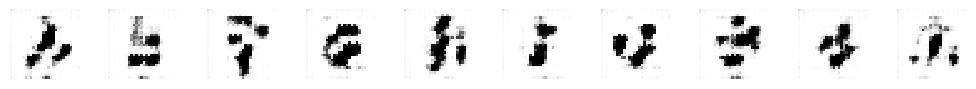

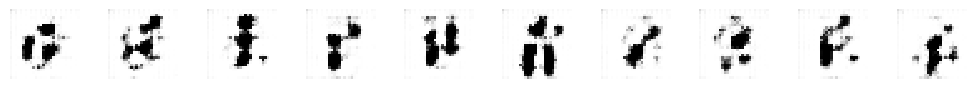

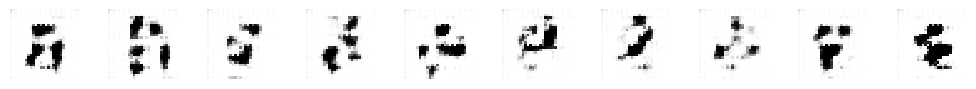

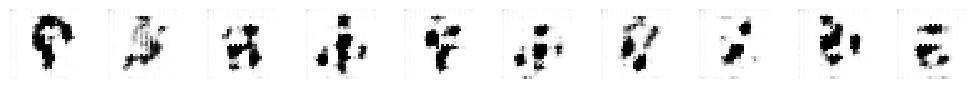

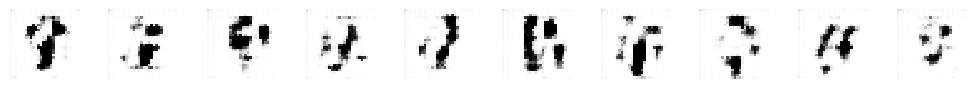

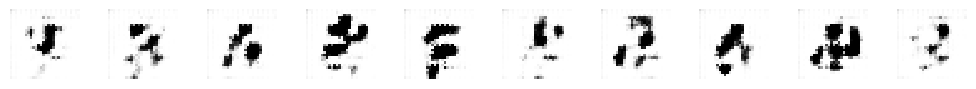

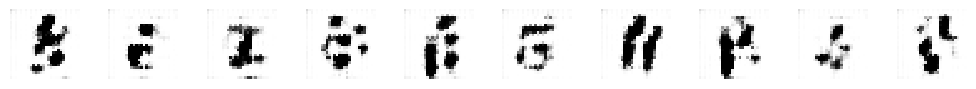

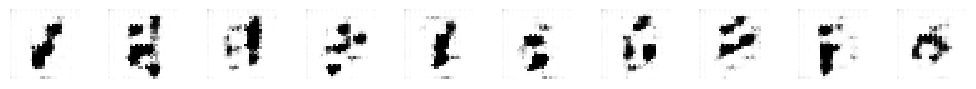

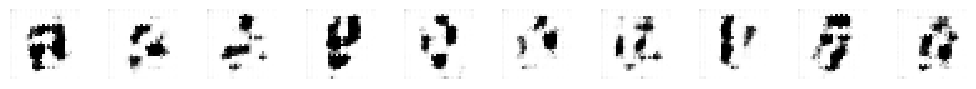

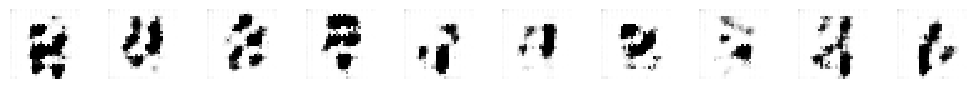

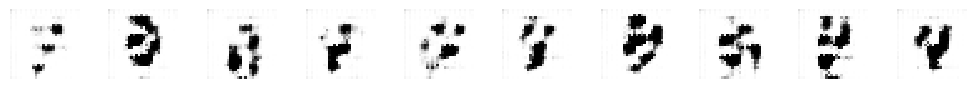

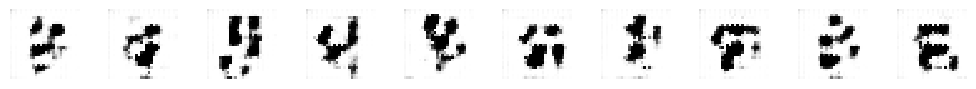

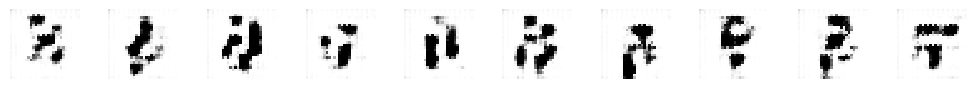

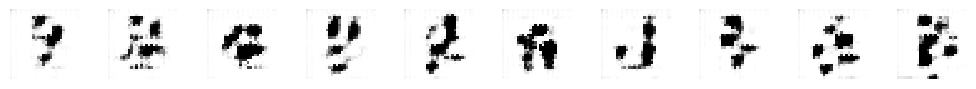

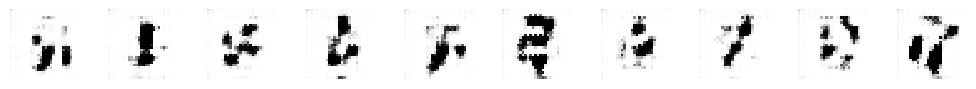

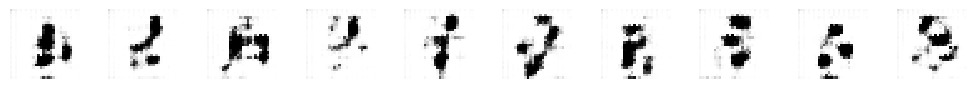

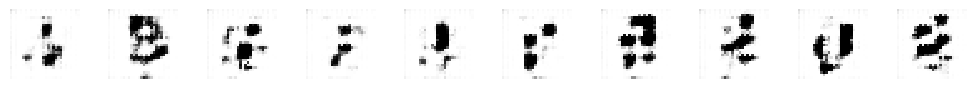

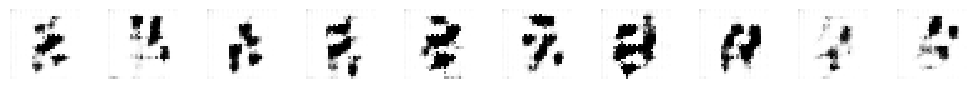

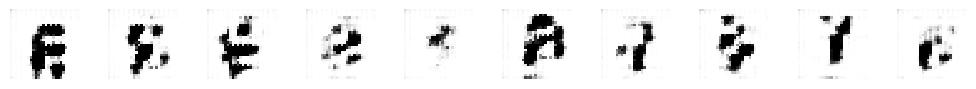

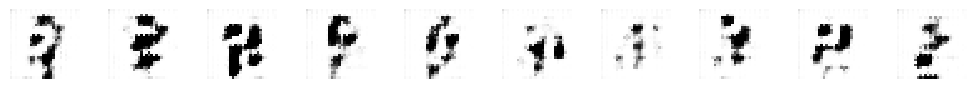

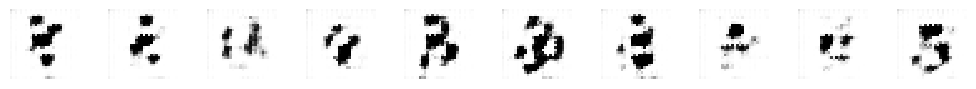

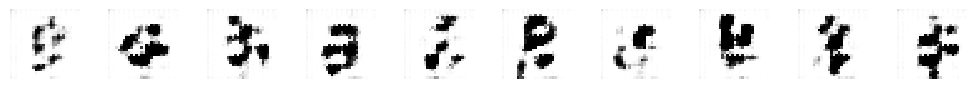

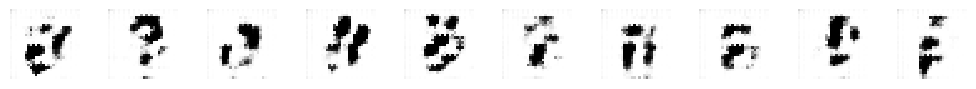

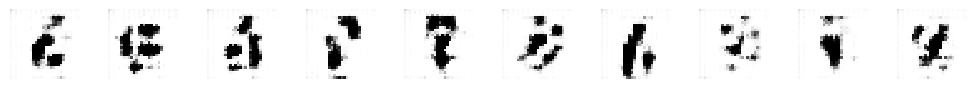

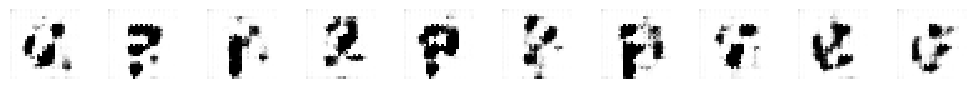

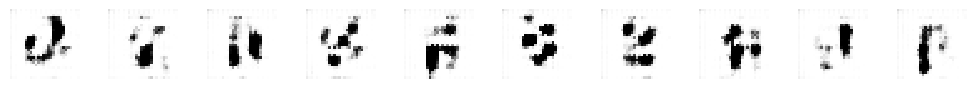

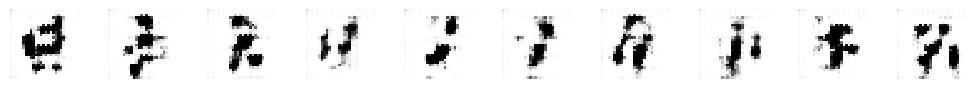

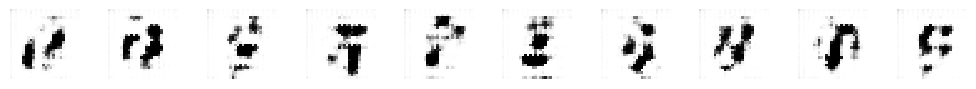

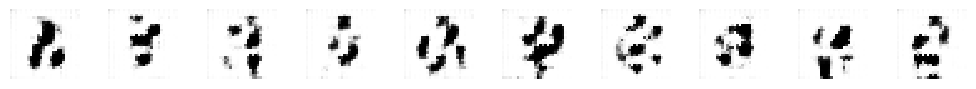

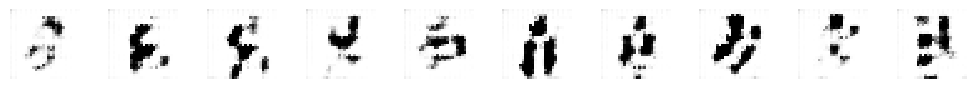

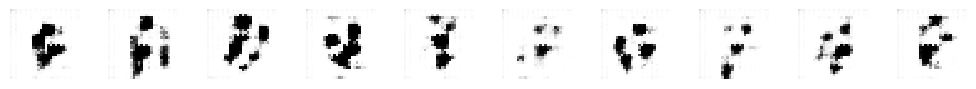

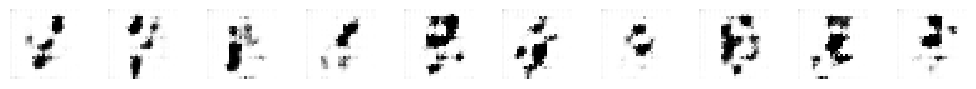

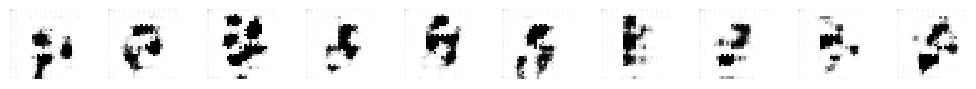

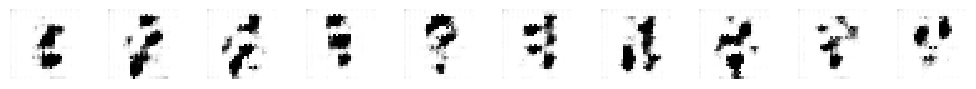

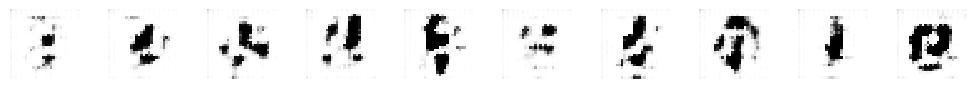

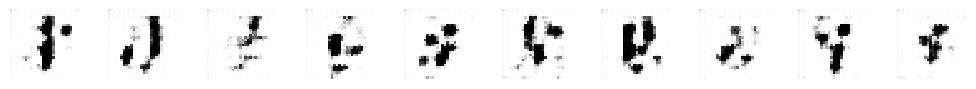

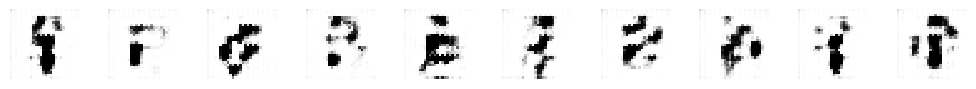

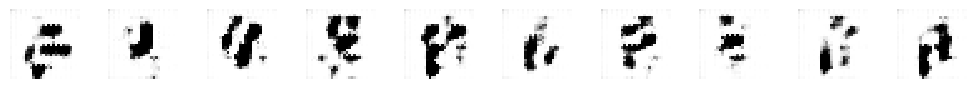

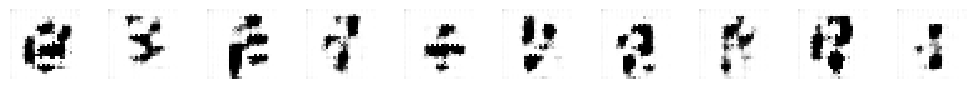

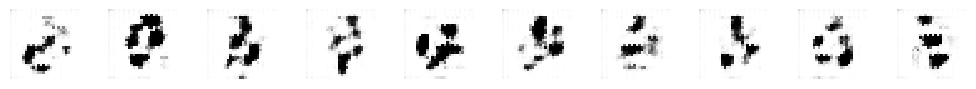

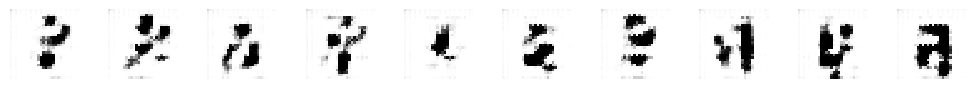

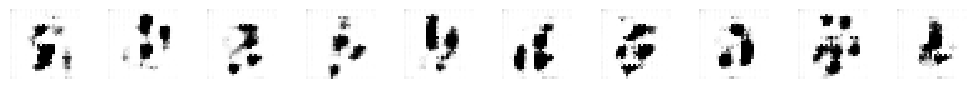

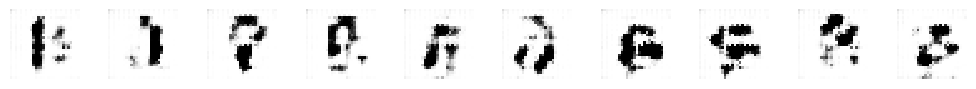

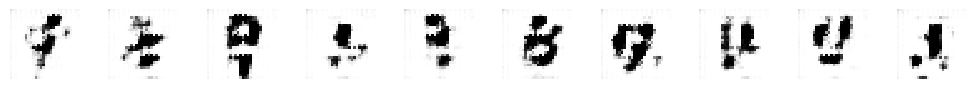

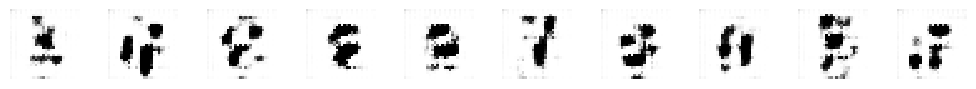

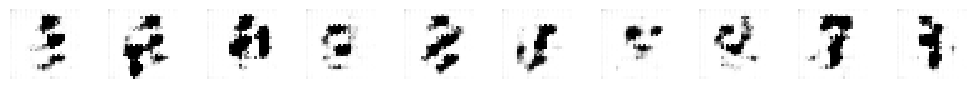

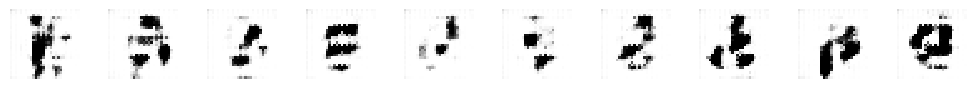

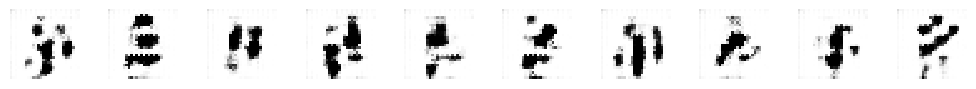

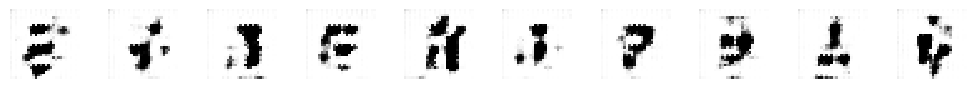

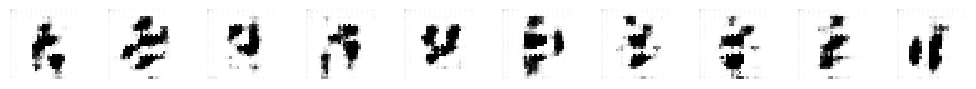

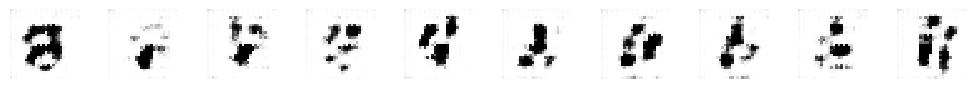

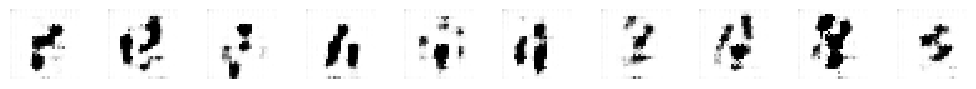

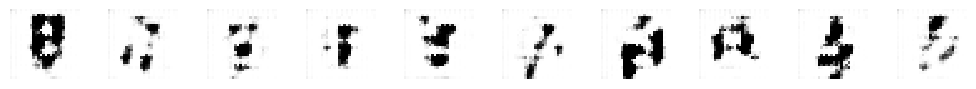

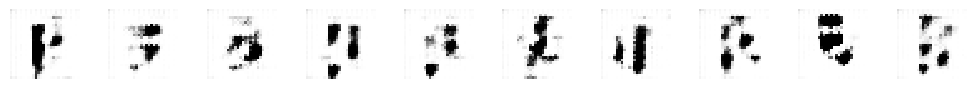

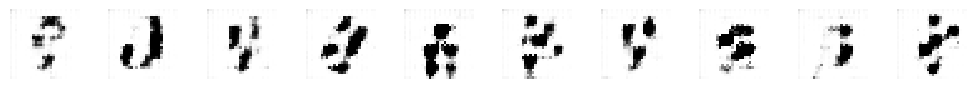

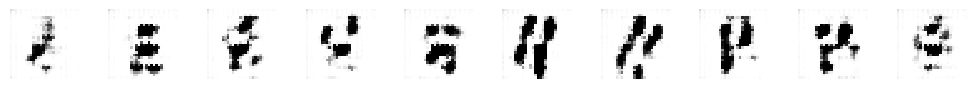

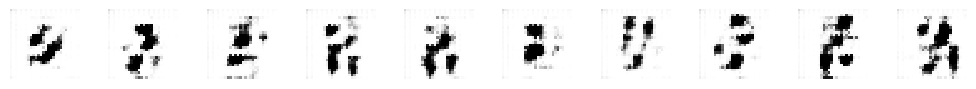

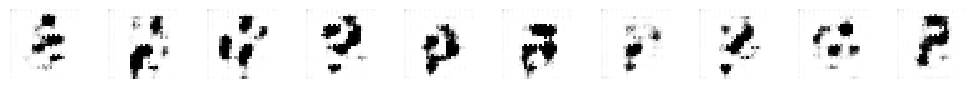

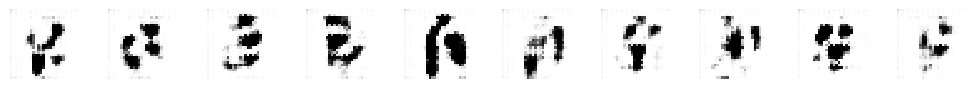

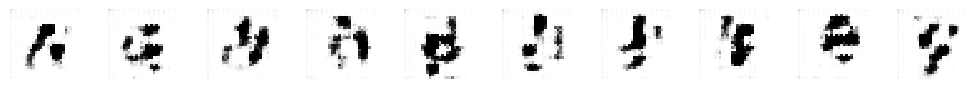

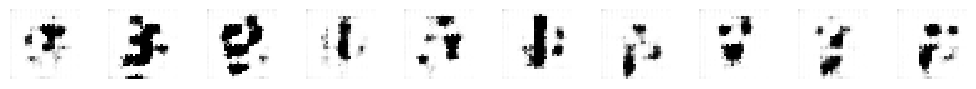

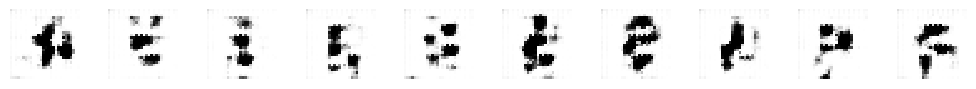

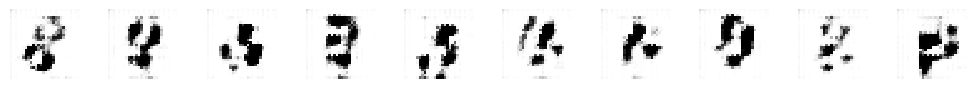

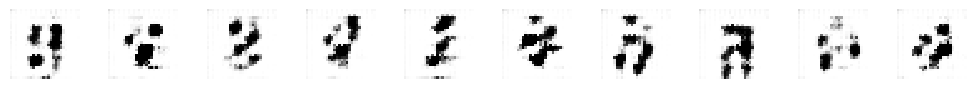

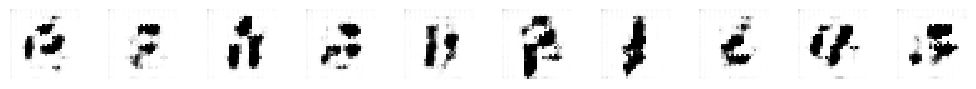

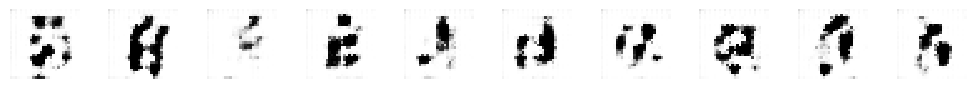

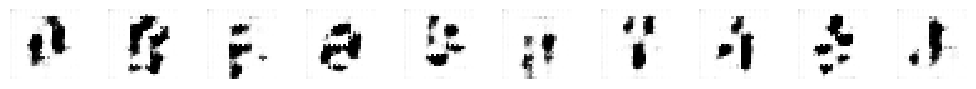

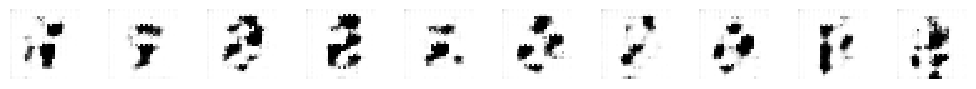

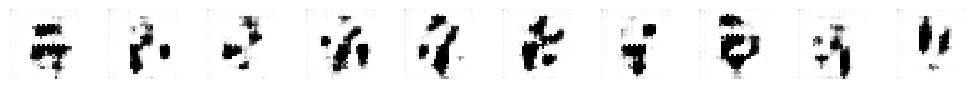

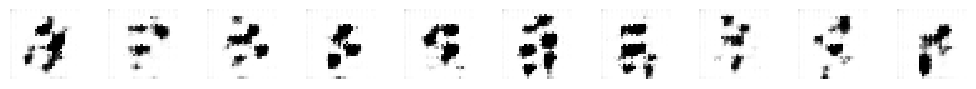

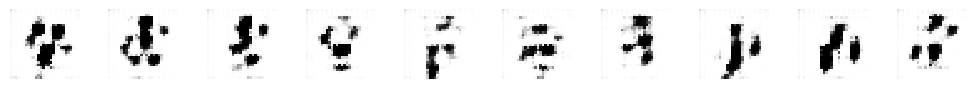

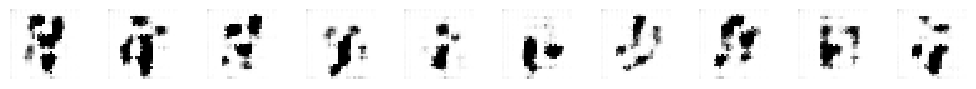

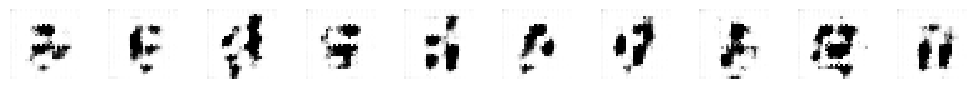

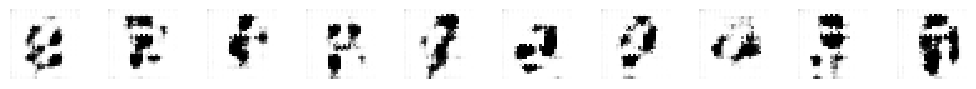

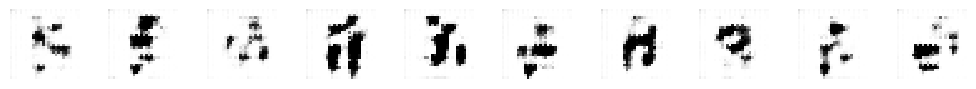

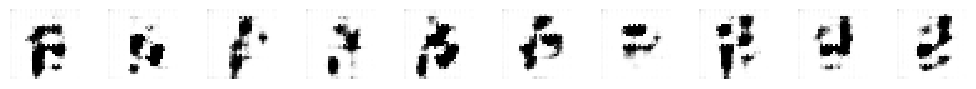

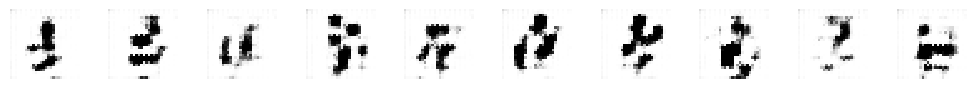

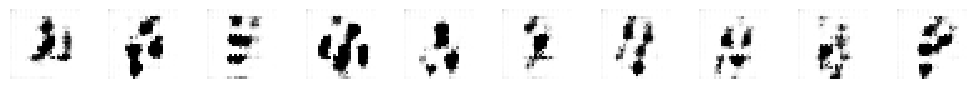

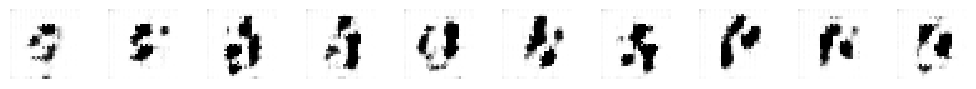

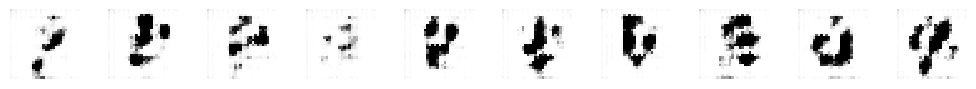

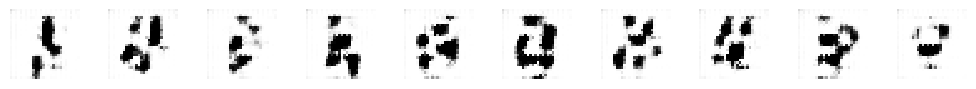

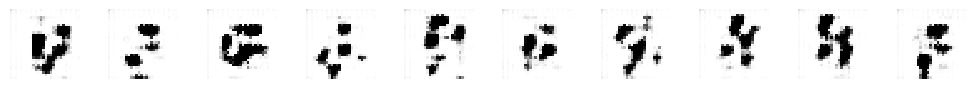

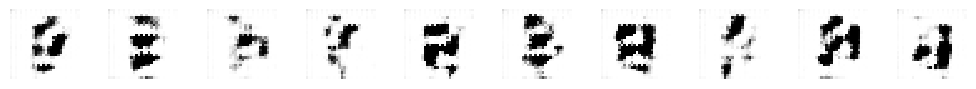

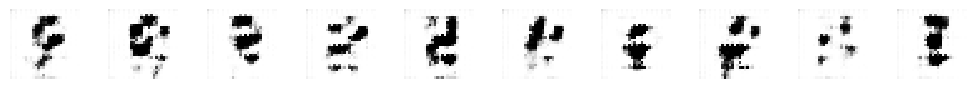

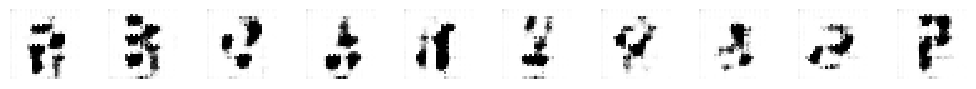

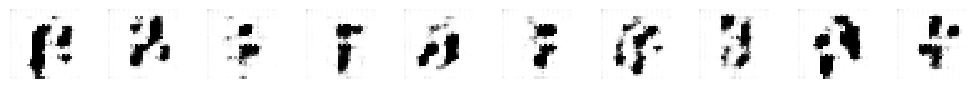

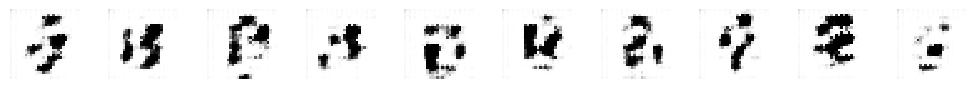

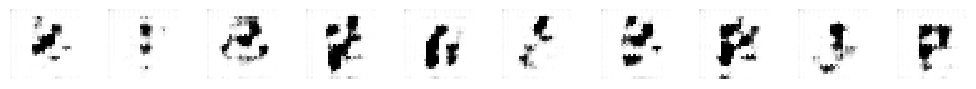

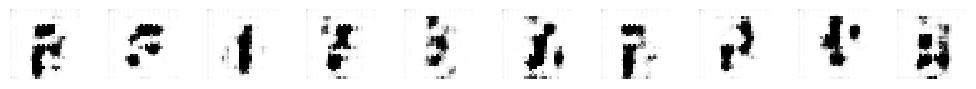

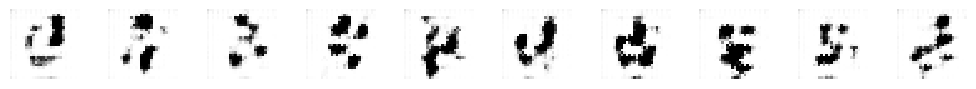

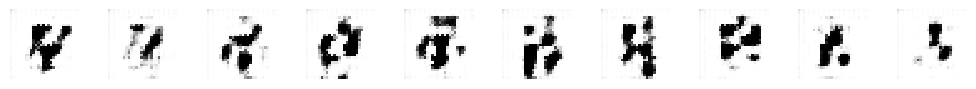

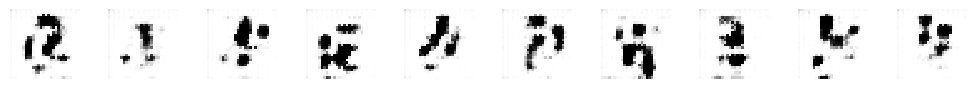

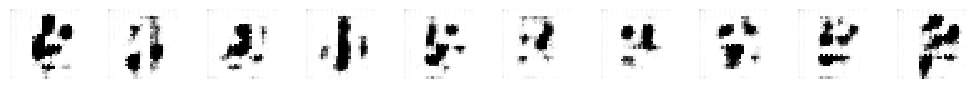

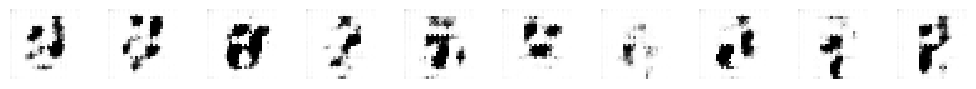

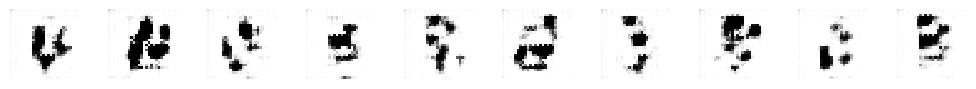

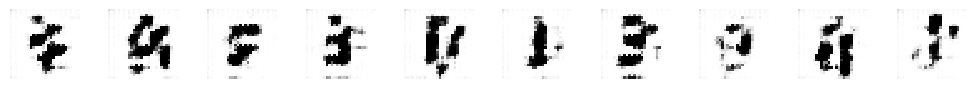

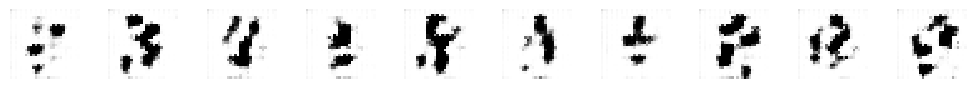

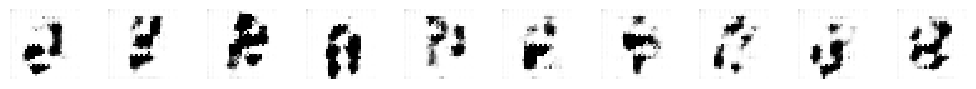

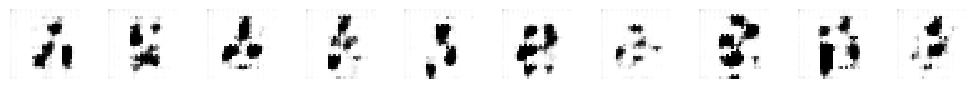

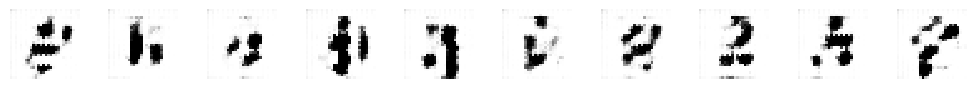

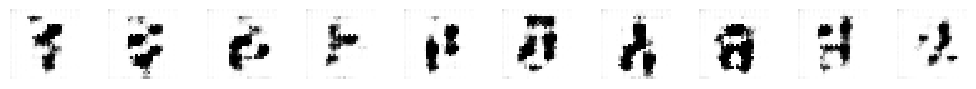

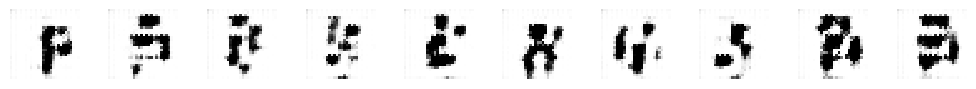

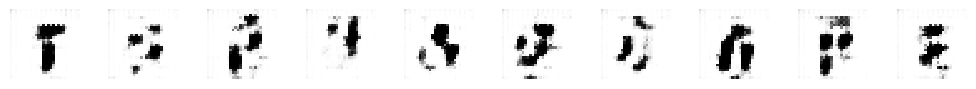

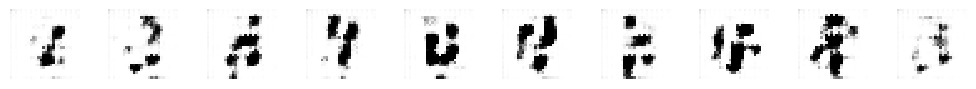

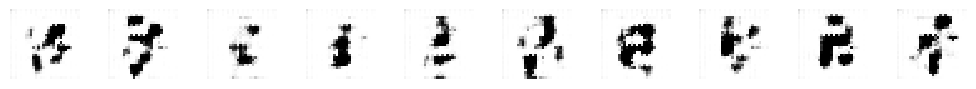

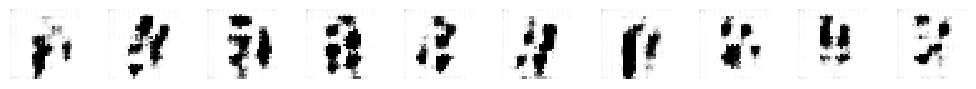

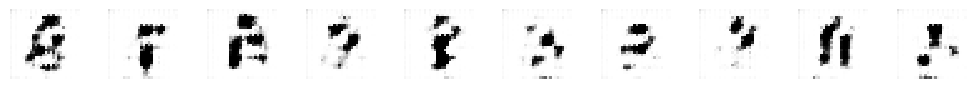

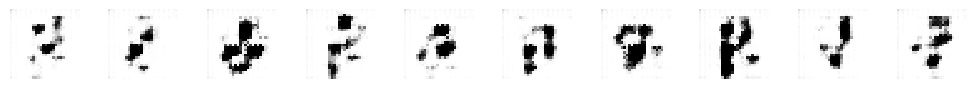

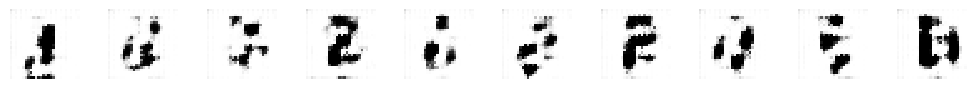

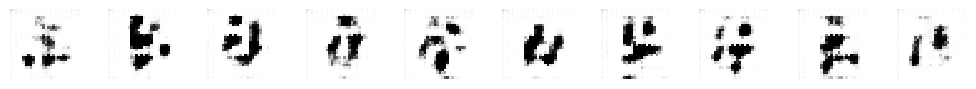

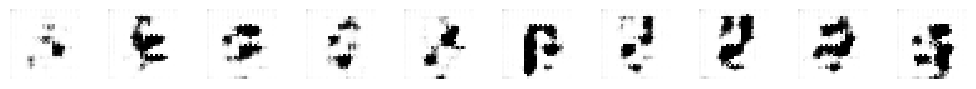

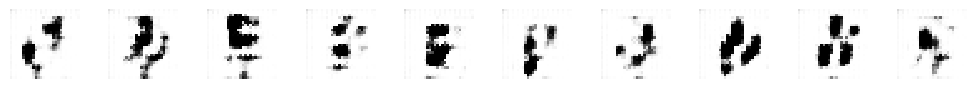

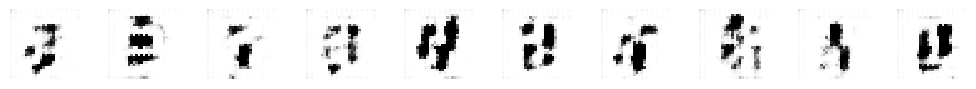

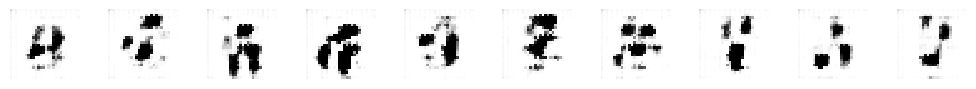

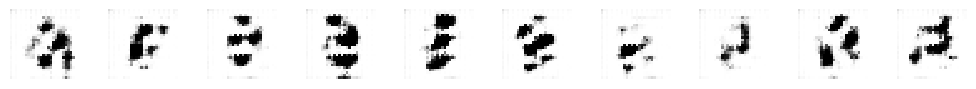

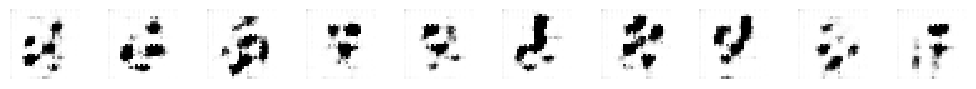

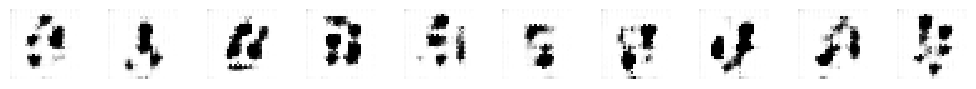

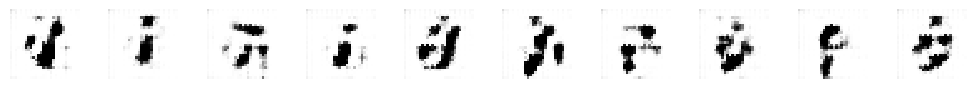

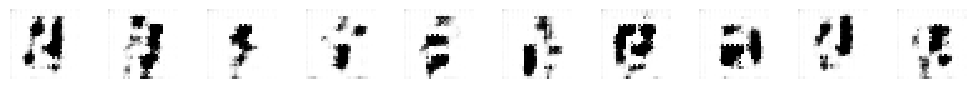

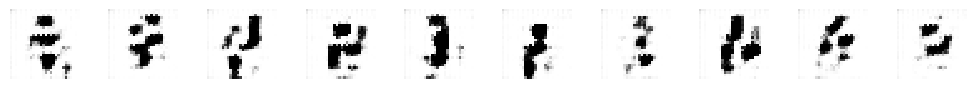

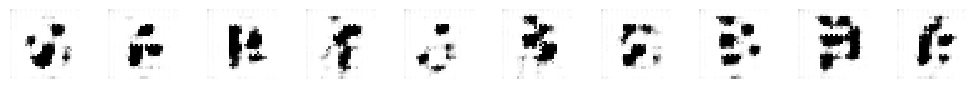

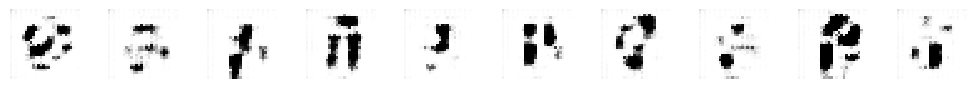

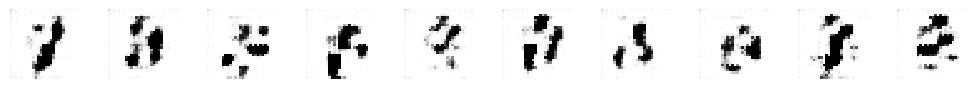

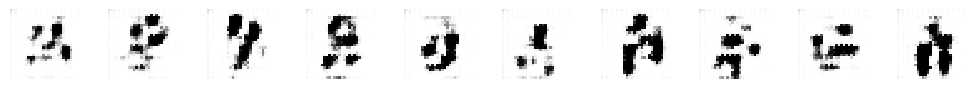

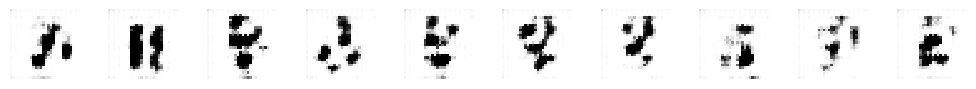

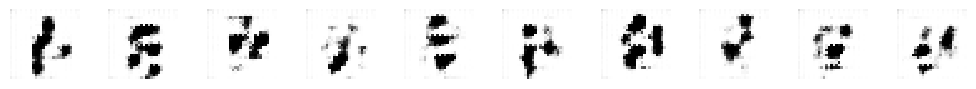

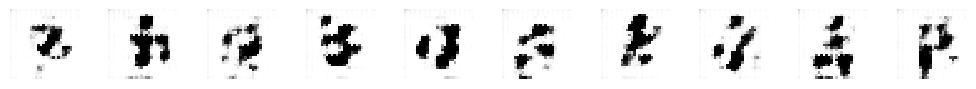

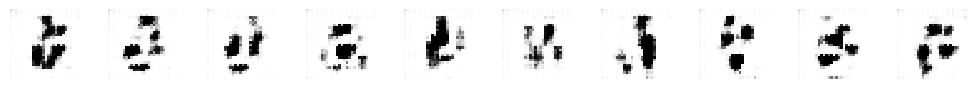

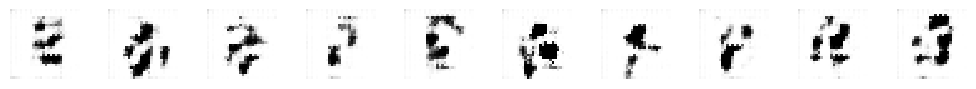

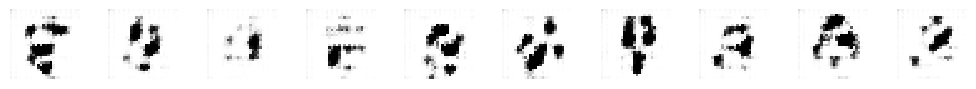

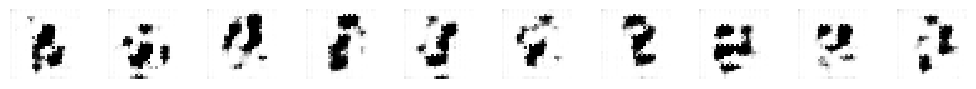

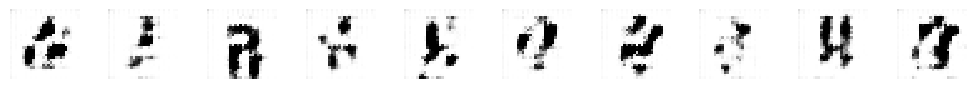

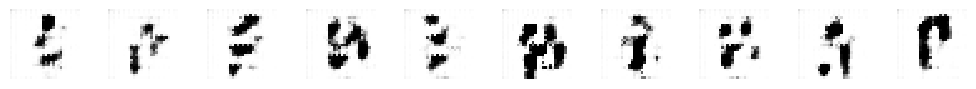

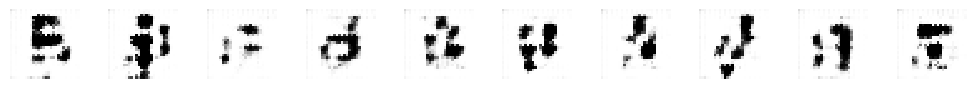

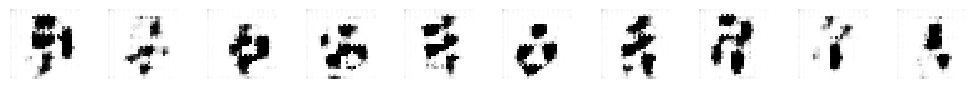

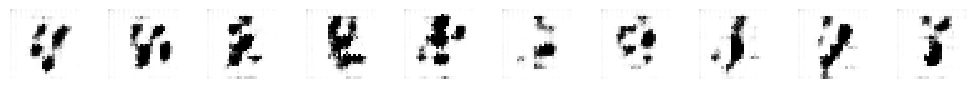

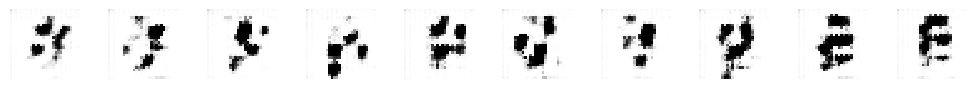

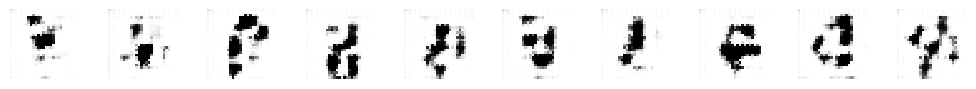

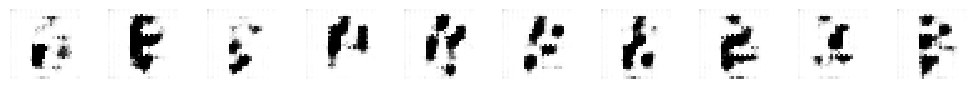

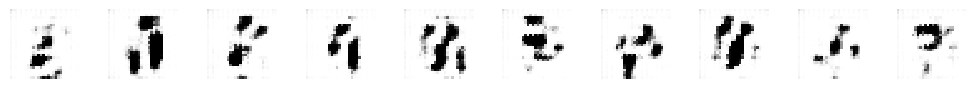

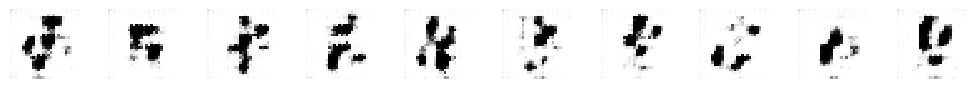

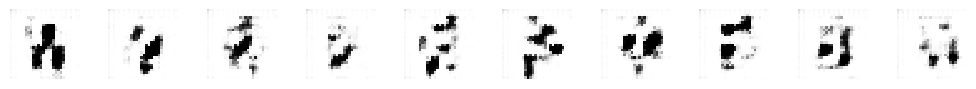

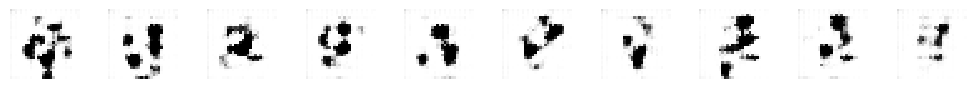

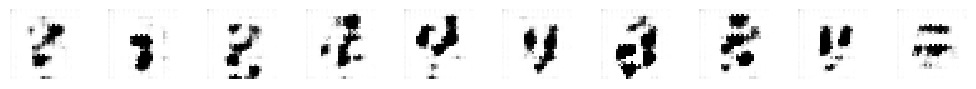

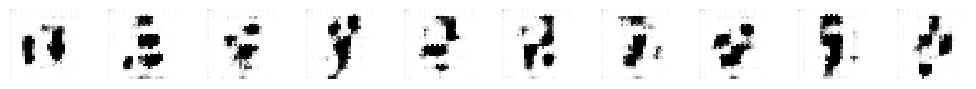

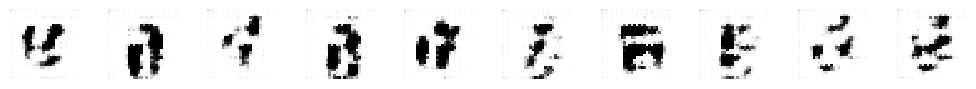

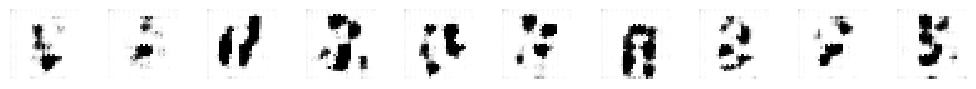

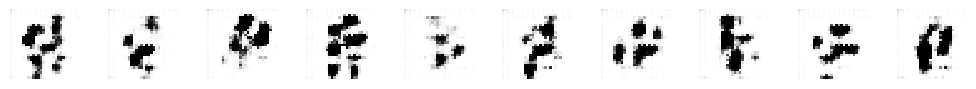

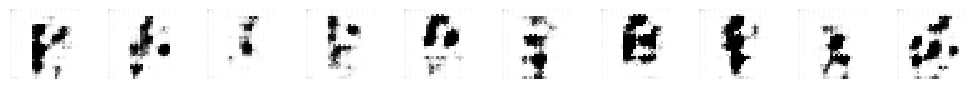

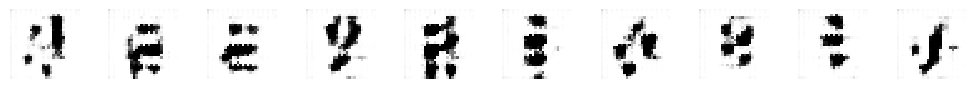

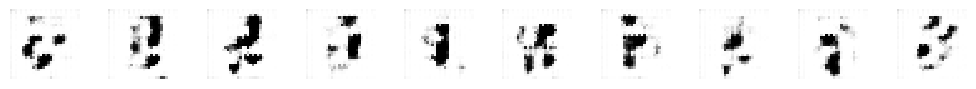

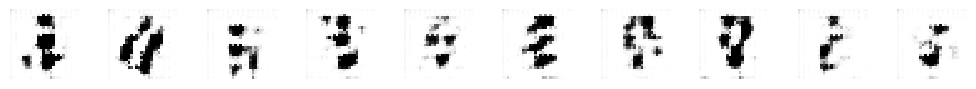

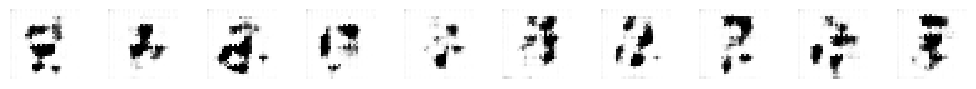

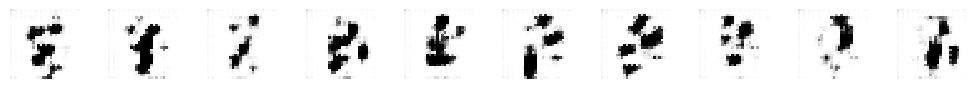

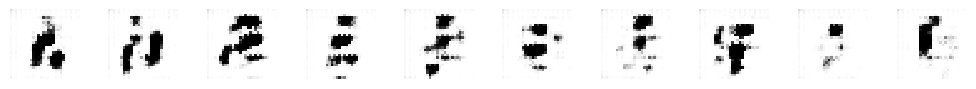

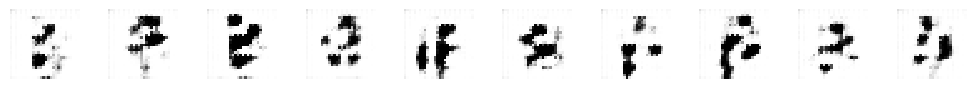

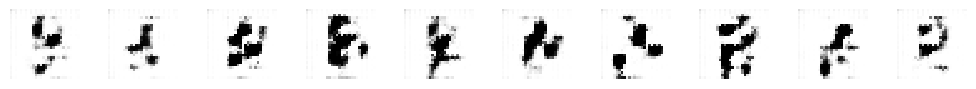

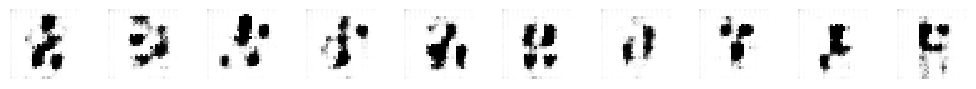

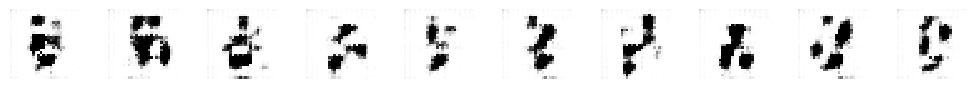

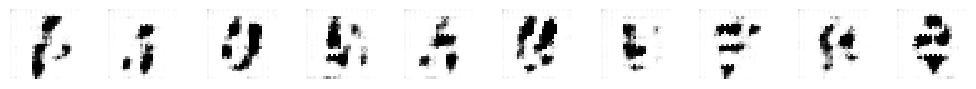

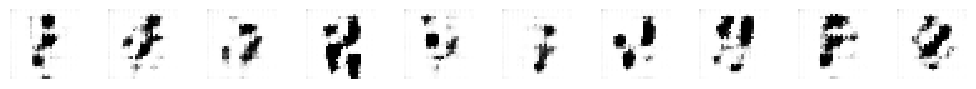

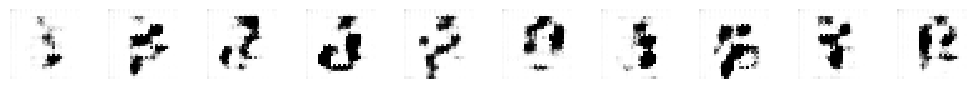

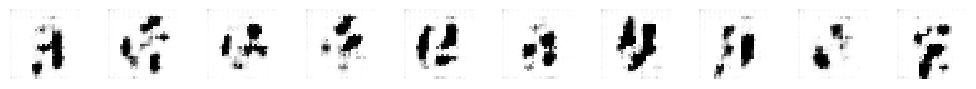

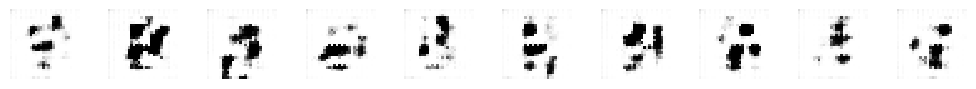

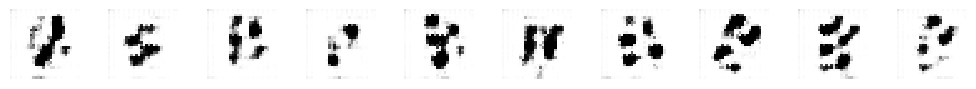

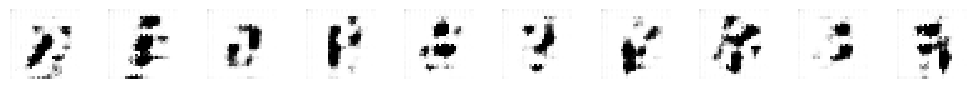

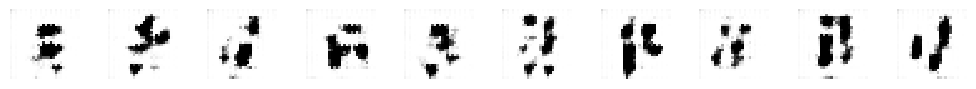

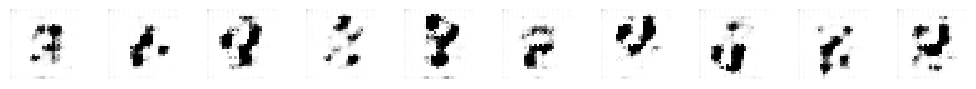

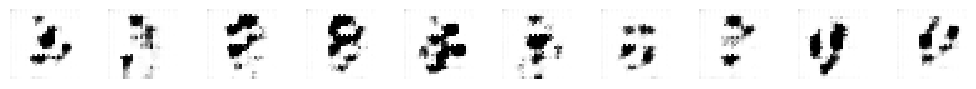

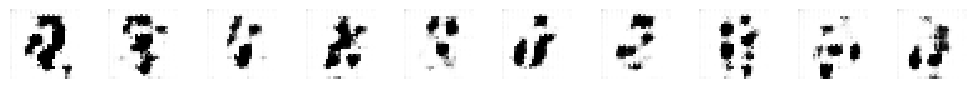

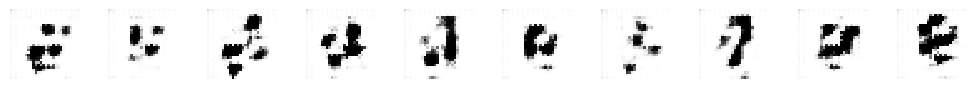

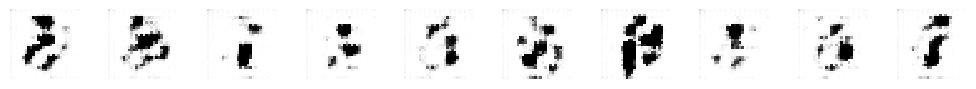

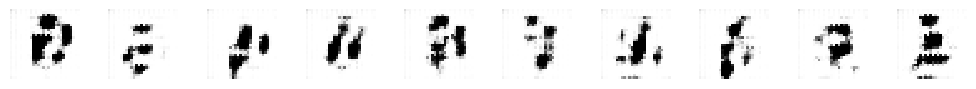

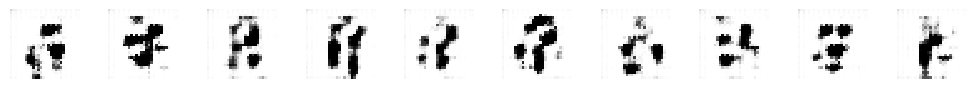

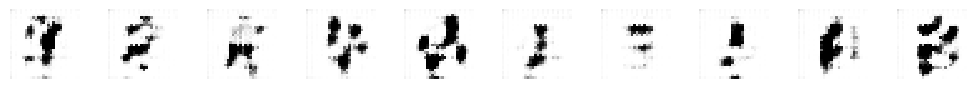

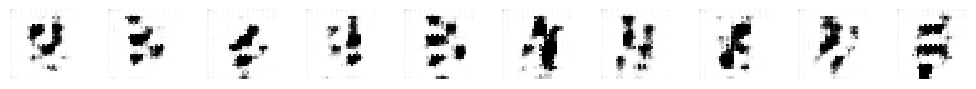

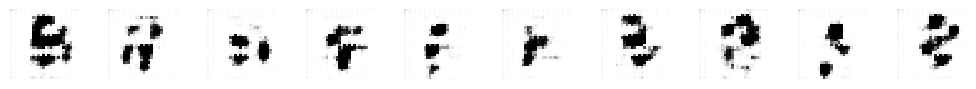

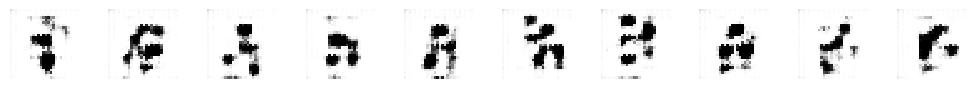

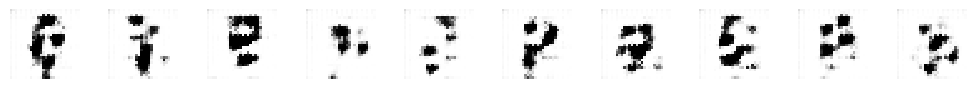

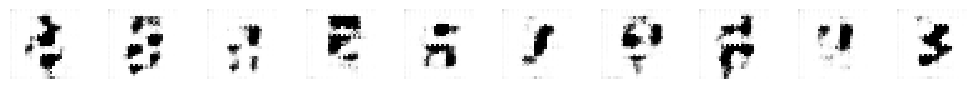

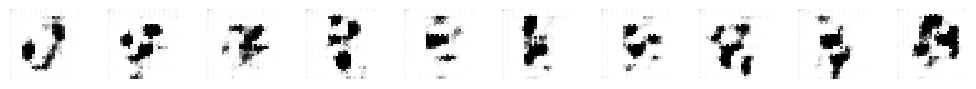

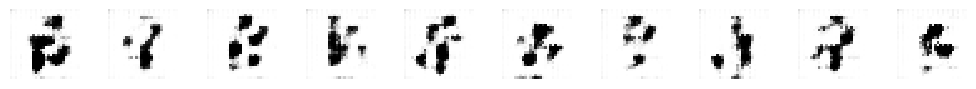

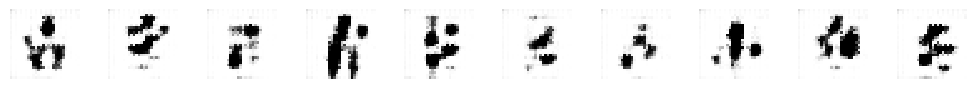

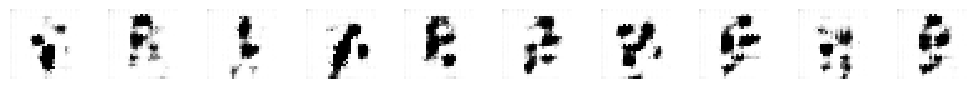

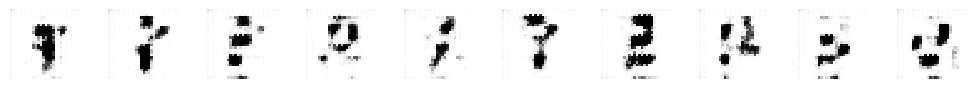

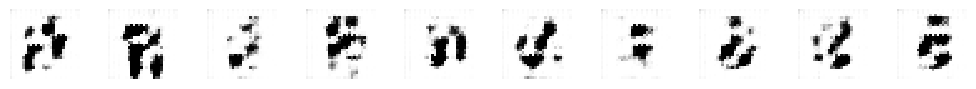

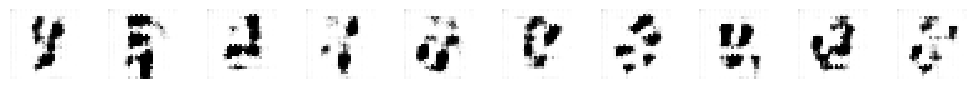

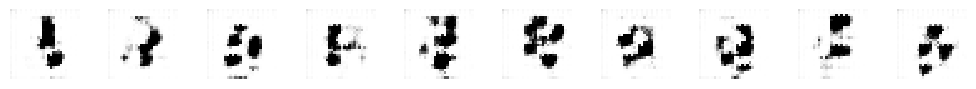

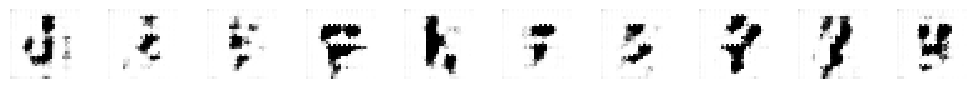

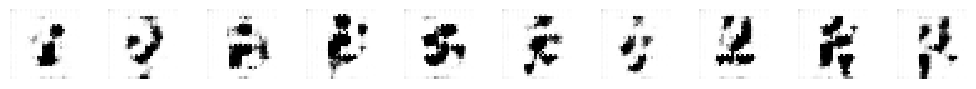

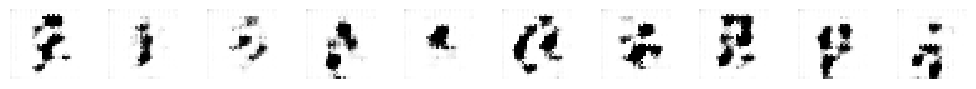

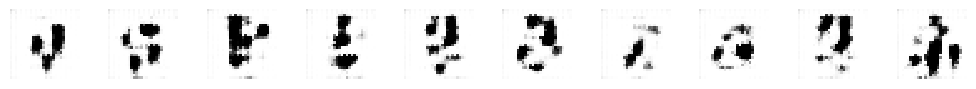

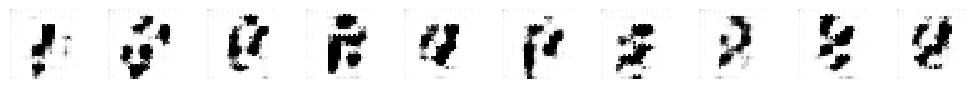

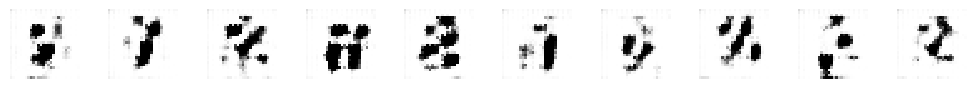

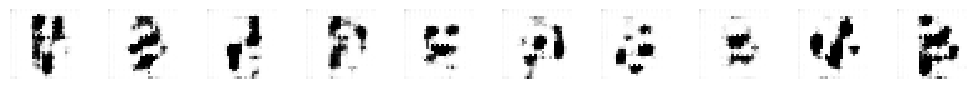

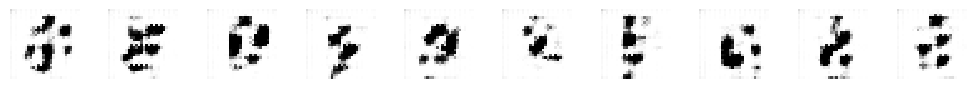

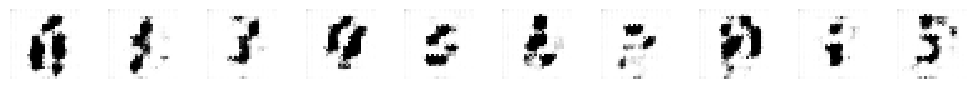

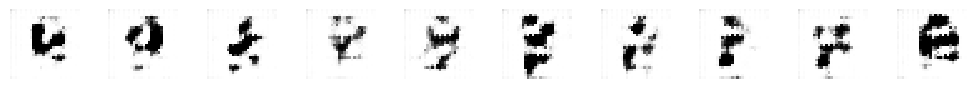

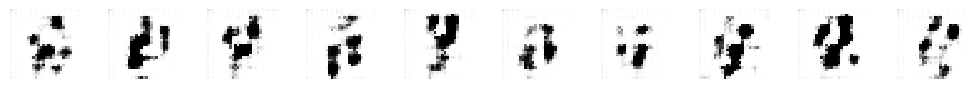

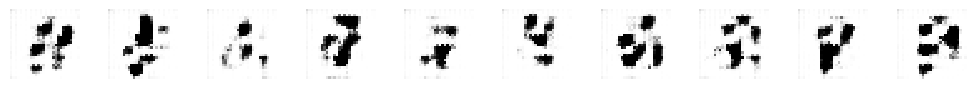

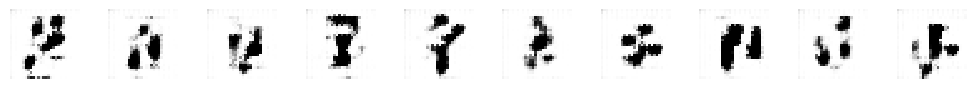

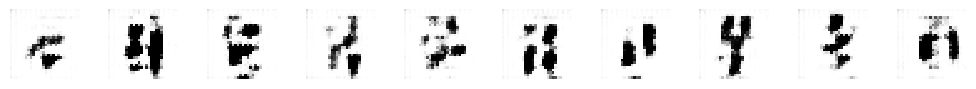

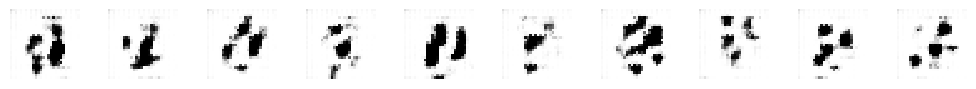

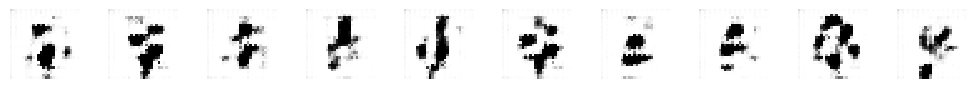

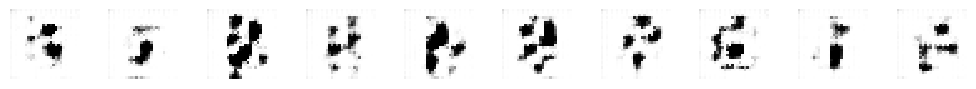

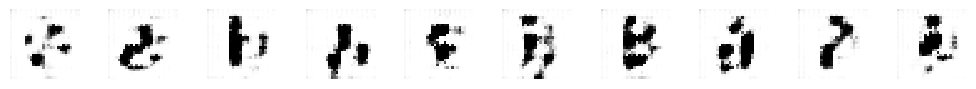

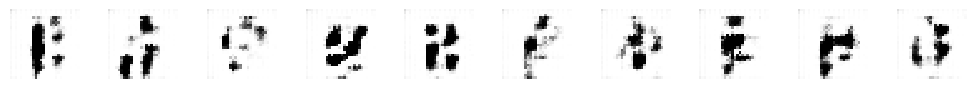

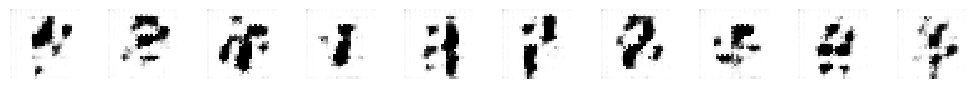

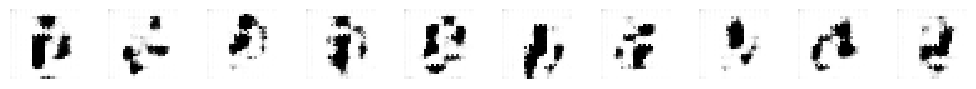

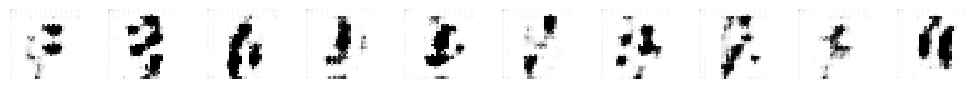

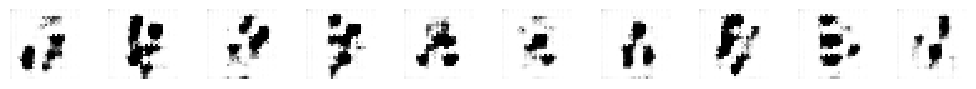

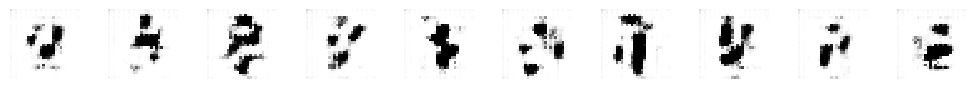

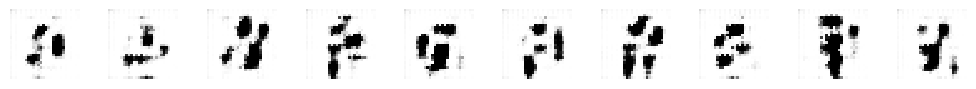

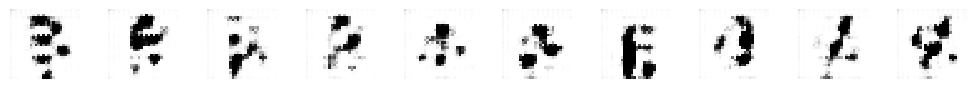

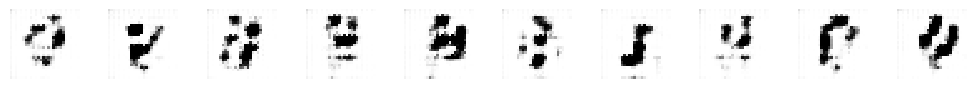

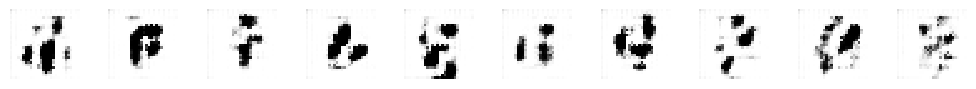

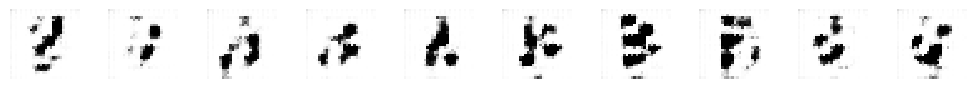

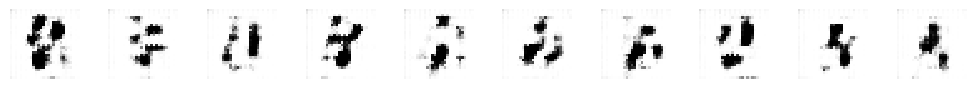

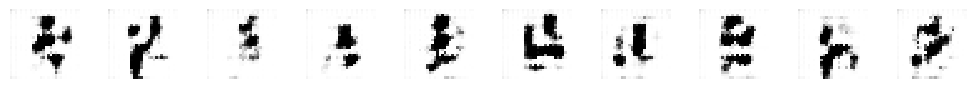

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate and plot images
def generate_and_plot_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')

# Training loop (assuming you have a 'gan' model defined as in the previous example)

batch_size = 64
epochs = 30000

for epoch in range(epochs):
    # Training steps...

    # Generate and plot images every 100 epochs
    if epoch % 100 == 0:
        generate_and_plot_images(generator, epoch)
